# Numerische Untersuchungen für die BA
Veranschaulichung einiger funktionen die in der BA auftreten.

## Untersuchung von S(N)
Wir untersuchen hier das Wachstum der Funktion
$$ S(N) = \sum_{k \leq \sqrt N} \sqrt{N-k^2}. $$
$S(N)$ erfüllt die asymptotische Formel
$$ S(N) = \frac{\pi N}4 - \frac{\sqrt N}2 + E(N). $$
Dabei ist $E(N) \ll N^\frac 14$. Wir untersuchen im folgenden das Wachstum von $E(N)$.

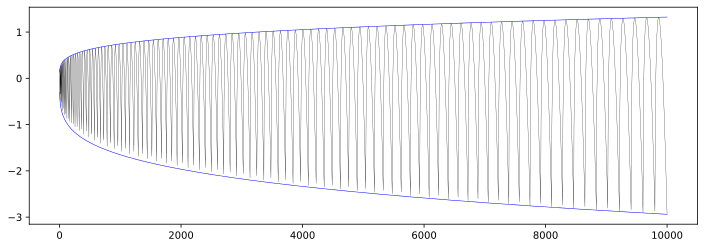

<IPython.core.display.Math object>

<IPython.core.display.Math object>

Maxima (ungefähr) bei: [0.1, 0.7, 1.3, 1.9, 2.5, 3.1, 3.7, 4.3, 4.9, 5.5, 6.1, 6.7, 7.3, 7.9, 8.6, 9.2, 9.8, 10.4, 11.0, 11.6, 12.2, 12.8, 13.4, 14.0, 14.6, 15.2, 15.8, 16.4, 17.0, 17.6, 18.2, 18.8, 19.5, 20.1, 20.7, 21.3, 21.9, 22.5, 23.1, 23.7, 24.3, 24.9, 25.5, 26.1, 26.7, 27.3, 27.9, 28.5, 29.1, 29.7, 30.4, 31.0, 31.6, 32.2, 32.8, 33.4, 34.0, 34.6, 35.2, 35.8, 36.4, 37.0, 37.6, 38.2, 38.8, 39.4, 40.0, 40.6, 41.2, 41.9, 42.5, 43.1, 43.7, 44.3, 44.9, 45.5, 46.1, 46.7, 47.3, 47.9, 48.5, 49.1, 49.7, 50.3, 50.9, 51.5, 52.1, 52.8, 53.4, 54.0, 54.6, 55.2, 55.8, 56.4, 57.0, 57.6, 58.2, 58.8, 59.4, 60.0, 60.6]


In [9]:
%matplotlib inline
%config InlineBackend.figure_format = 'svg'

import numpy as np
import matplotlib.pyplot as plt

#Definition von S(N)
import math

def S(N):
    s = 0
    j = 1
    while(j < math.sqrt(N)):
        s += math.sqrt(N-j*j)
        j += 1
    return s

#Herausfiltern des Fehlerterms

def E(N):
    return (S(N) - N*math.pi/4 + math.sqrt(N)/2)

def E_max(N):
    N = int(N)
    vals = [E(i) for i in range(max(0,N-50),N+50)]
    return max(vals)

#Plotbare funktion
def E_plt(X):
    lst = []
    for x in X:
        lst.append(E(x))
    return lst

def upperConst(x):
    return max((E_plt(x)/(x**0.25)))
def lowerConst(x):
    return min(E_plt(x)/(x**0.25))

x = np.linspace(1, 10000, 5000) #Variable
y = np.linspace(1, 100, 100) #Variable


UC = upperConst(x)
LC = lowerConst(x)


#Plotting
plt.rcParams['figure.figsize'] = (12,4)
plt.plot(x, E_plt(x), '-', color='black', linewidth=0.25) #Errorfunction
plt.plot(x, UC*(x**(0.25)), '-', color='blue', linewidth=0.5) #Upper bound
plt.plot(x, LC*(x**(0.25)), '-', color='blue', linewidth=0.5) #Lower bound



#plt.plot(y**2, E_plt(y**2), '--', color='red', linewidth=0.5) #Values at perfect squares (minima?)
#plt.plot(y*(y+0.6)+0.1, E_plt(y*(y+0.6)+0.1), '--', color='green', linewidth=0.5) #maxima

plt.show()

from IPython.display import display, Math

display(Math(r'\text{Upper bound: }' + str(UC) + r' N^\frac 14')) #Bei ~0.13242119434469748
display(Math(r'\text{Lower bound: }' + str(LC) + r' N^\frac 14')) #Ber ~−0.29390545268688584


def find_Max(): #Gives a list of all local maxima to N
    lst = []
    m = 0.0
    i = 0.0
    while 1:
        if(E(i) >= m):
            m = E(i)
            if E(i+0.05) < m:
                yield i
        i += 0.05


r = 0
maxima = []
for m in find_Max():
    if r > 100:
        break
    maxima += [float(int(10*(m-r*r)+0.01))/10]
    r += 1

for i in range(r-1):
    if int(5*(maxima[i+1]-maxima[i])-0.01) != 3 and int(5*(maxima[i+1]-maxima[i])+0.01) != 3:
        print(str(maxima[i]) + ", " + str(maxima[i+1]))

print("Maxima (ungefähr) bei: " + str(maxima))



Sieht irgendwie interessant aus.
Naja.

Der Plot sieht nicht so aus, als könne man den Fehler von $N^\frac 14$ noch verbessern.

### Interessante Entdeckung
Es scheint, als würden die Minima bei Quadratzahlen angenommen werden. Welche Zahlen sind die Maxima?

Nach einigen Berechnungen sind die Maxima ungefähr bei $x^2 + \frac 35 x +0.1, x\in \mathbb N$


# Zusammenhang mit Hardy's Identität.
Wenn unsere Ergebnisse stimmen, dann entspricht $E(N)$ (ungefähr) dem Term
$$H(N) = \frac 12 \sqrt N \sum_{n=1}^\infty \frac{J_1(2\pi \sqrt N n)}n.$$
Wir können die Aymptotische folgende Formel für zum Approximieren der Besselfunktion benutzen:
$$J_1(x) = \left (\frac 2 {\pi x} \right)^{\frac 12}\cos(x - \frac 34 \pi) + O(x^{- \frac 32})$$ 

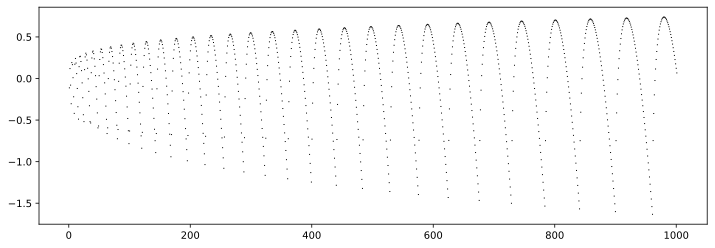

In [11]:
%matplotlib inline
%config InlineBackend.figure_format = 'svg'

def J(x):
    return math.sqrt(2/(math.pi * x)) * math.cos(x-0.75*math.pi)

def J_plt(X):
    lst = []
    for x in X:
        lst.append(J(x))
    return lst
def H(N):
    S = 0
    i = 1
    while(i <= N**(3/2)):
        S += J(2*math.pi*math.sqrt(N)*i)/i
        i+=1
    return S * math.sqrt(N)*0.5

def H_plt(X):
    lst = []
    for x in X:
        lst.append(H(x))
    return lst



x = np.linspace(1, 1001, 1000) #Variable
plt.rcParams['figure.figsize'] = (12,4)
#plt.plot(x, J_plt(x), '-', color='green', linewidth=0.25) #Besselfunktion
plt.plot(x, H_plt(x), ',', color='black', linewidth=0.25) #Hardy-Errorfunktion



Damn. Der Graph des Fehlers von Hardy sieht tatsächlich genau so aus wie unser Fehlerterm.

In wie fern unterscheiden sich $H$ und $E$?

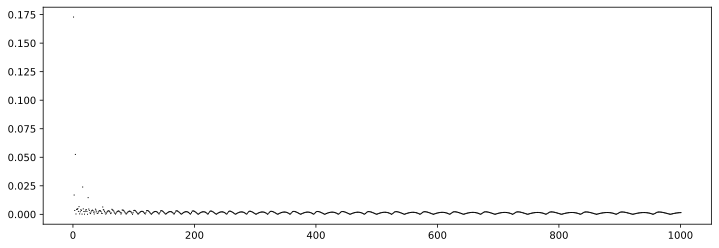

In [10]:
def F_plt(X):
    lst = []
    for x in X:
        lst.append(abs(H(x)-E(x)))
    return lst
x = np.linspace(1, 1001, 1000) #Variable
plt.rcParams['figure.figsize'] = (12,4)
plt.plot(x, F_plt(x), ',', color='black', linewidth=0.25) #Errorfunction

Nice! $H$ und $E$ scheinen sich tatsächlich kaum zu unterscheiden.

## Untersuchung von $R(N)$
Wir können das selbe mit $R(N)$ machen. $$R(N) = \{(x,y) \in \mathbb N \mid x^2 + y^2 \leq N\} = \frac {\pi N}4 - [\sqrt N] + E$$
vermutlich gilt $$E \ll N^{1/4} $$

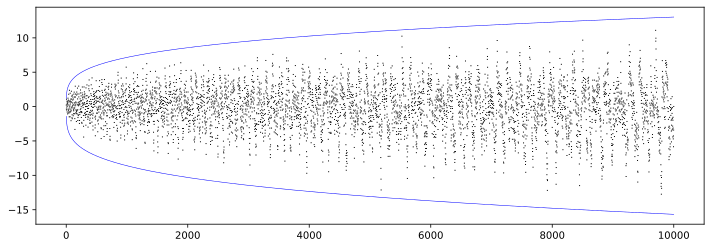

<IPython.core.display.Math object>

<IPython.core.display.Math object>

In [3]:
%matplotlib inline
%config InlineBackend.figure_format = 'svg'

import numpy as np
import matplotlib.pyplot as plt
import math



def R(N):
    s = 0
    j = 1
    while(j <= math.sqrt(N)):
        s += int(math.sqrt(N-j*j))
        j += 1
    return s

#Herausfiltern des Fehlerterms

def E(N):
    return (R(N) - N*math.pi/4 + int(math.sqrt(N)))

# Anstatt den Fehlerterm stichweise zu ermitteln, können wir auch das Maximum in der Umgebung von N bestimmen.
def E_max(N):
    N = int(N)
    vals = [(E(i)) for i in range(max(0,N-50),N+50)]
    return max(vals)

#Plotbare funktion
def E_plt(X):
    res = []
    for x in X:
        res.append(E(x))
    return res

#Konstanten im Fehlerterm finden
def upperConst(x):
    return max(E_plt(x)/(x**0.25))
def lowerConst(x):
    return min(E_plt(x)/(x**0.25))

x = np.linspace(1, 10000, 5000) #Variable

UC = upperConst(x)
LC = lowerConst(x)

#Plotting
plt.rcParams['figure.figsize'] = (12,4)
plt.plot(x, E_plt(x), ',', color='black', linewidth=0.25) #Errorfunction
plt.plot(x, UC*(x**(0.26)), '-', color='blue', linewidth=0.5) #Upper bound 
plt.plot(x, LC*(x**(0.26)), '-', color='blue', linewidth=0.5) #Lower bound
plt.show()

from IPython.display import display, Math

display(Math(r'\text{Upper bound: }' + str(UC) + r' N^\frac 14'))
display(Math(r'\text{Lower bound: }' + str(LC) + r' N^\frac 14'))

Sieht nicht so interesant aus. Naja.

Viel zu random um überhaupt irgendwas sagen zu können. Wenn man richtig plottet wirkt der Fehler $N^\frac 14$ vernünftig.